In [21]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ipywidgets import interact
global m_p; m_p = 0.13957

sig_p = lambda x: np.sqrt(1 - 4*m_p**2/x)
g_s = lambda s, m_q, g_q: g_q*s/m_q**2 * (sig_p(s)/sig_p(m_q**2))**3 * np.heaviside(s - 4*m_p**2, 0)

def model(s, m_q, g_q, m_w, g_w, e_w, a, b, c):
    part1 = (m_q)**4/((m_q**2 - s)**2 + m_q**2*g_s(s, m_q, g_q)**2)
    part2 = 1 + (e_w * 2*s * (m_w**2 - s))/((m_w**2 - s)**2 + m_w**2*g_w**2)
    part3 = c*(1 + a*s + b*s**2)**2
    return part1 * part2 * part3

In [16]:
data = np.loadtxt('../data/SND-VFF.txt')
x_data = data[:,0]
y_data = data[:, 1]
sigma = data[:, 2]
p0 = [0.765 ,0.115 ,0.813 ,0.041 ,-0.006 ,-1.005 ,1.014 ,1.854]     # guess

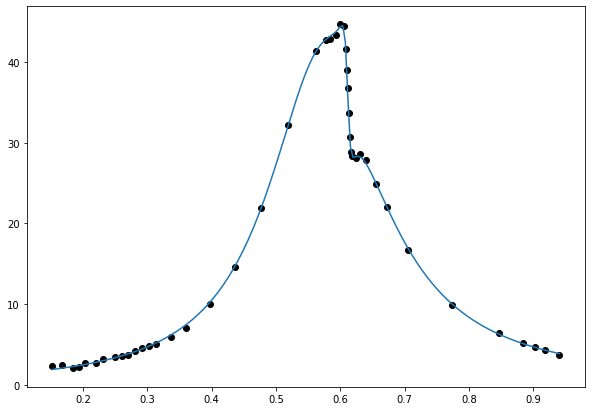

In [75]:

data = np.loadtxt('../data/SND-VFF.txt')
cov_stat = np.loadtxt('../data/BABAR-StatCov.txt')
x_data = data[:,0]
y_data = data[:, 1]

p0 = [0.9, 0.2, 0.81, 0.04, 0.02, -1, 0.84, 1.55]   # in GeV

p, pcov = curve_fit(model, x_data, y_data, p0)#, sigma=cov_stat)
x_model = np.linspace(x_data[0], x_data[-1], 200)

plt.figure(figsize=[10, 7])
plt.scatter(x_data, y_data, c='black')
plt.plot(x_model, model(x_model, *p))

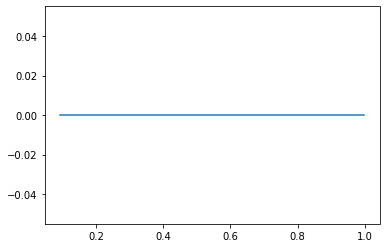

In [81]:
np.eye(len(x_data)) * np.array([0.032 if i<=2 else 0.013 for i in range(len(x_data))])

array([[0.032, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.032, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.032, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.   , ..., 0.013, 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.013, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.013]])